In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as optimize

## 测试拟合sin(2*pi*x)正弦函数

In [16]:
def real_func(x):
    return np.sin(np.pi*2*x)

#poly1d（）函数可以按照输入的列表p返回一个多项式函数
def fit_fun(p,x):
    return np.poly1d(p)(x)

def loss(p,x,y):
    return fit_fun(p,x)-y

In [4]:
# 十个点
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪音的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0, 0.1) + y1 for y1 in y_]

def fit(M=0):
    #首先随机初始化多项式的参数
    p_init=np.random.rand(M+1)
    #使用最小二乘法计算，进行函数的拟合参数的自动调整
    import scipy.optimize as scipy_optimize
    p_lsq=scipy_optimize.leastsq(loss, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])

    # 可视化
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_fun(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

Fitting Parameters: [-0.00862527]


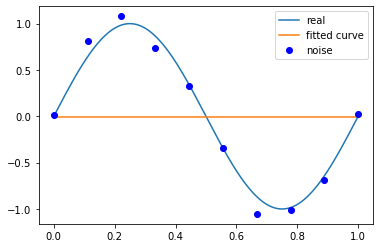

In [6]:
p_lsq_0=fit(M=0)

Fitting Parameters: [ 0.41635323 -1.88316712  0.78646364]


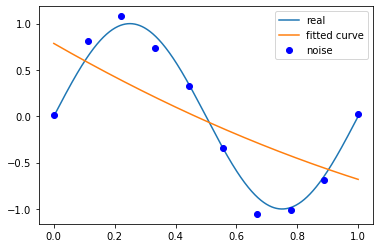

In [7]:
p_lsq_2=fit(2)

Fitting Parameters: [ 2.23597360e+01 -3.31232507e+01  1.08425591e+01  1.35344875e-02]


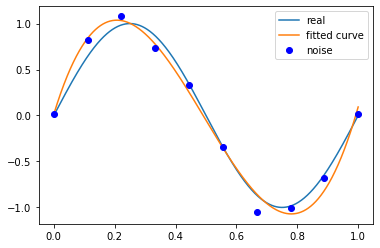

In [8]:
p_lsq_3=fit(3)

Fitting Parameters: [ 4.66650731e+03 -1.60219264e+04  1.98867032e+04 -8.86253145e+03
 -2.13565456e+03  3.64368037e+03 -1.36064736e+03  1.84945276e+02
 -1.06791585e+00  1.14912019e-02]


(array([ 4.66650731e+03, -1.60219264e+04,  1.98867032e+04, -8.86253145e+03,
        -2.13565456e+03,  3.64368037e+03, -1.36064736e+03,  1.84945276e+02,
        -1.06791585e+00,  1.14912019e-02]), 2)

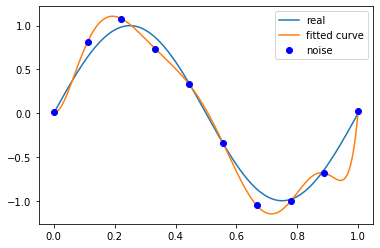

In [9]:
fit(9)

### 正则化，当结果过拟合时，引入正则化降低拟合过度

In [24]:
def residuals_func_regularization(p,x,y):
    loss=fit_fun(p,x)-y
    loss=np.append(loss,0.5*0.0001*np.square(p))   #使用2范数作为，过拟合的新的数据，用来环节过拟合现象
    return loss

In [28]:
def fitting_regularization(M=0):
    p_init=np.random.rand(M+1)
    p_lsq=optimize.leastsq(residuals_func_regularization,p_init,args=(x,y))  #得到对应的使用最小二乘法得到的拟合的多项式参数
    plt.plot(x_points,real_func(x_points),label='real')
    plt.plot(x_points,fit_fun(p_lsq[0],x_points),label='fit func')
    plt.plot(x,y,'bo',label='噪声')
    plt.legend()


E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22122 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22768 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22122 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22768 missing from current font.
  font.set_text(s, 0, flags=flags)


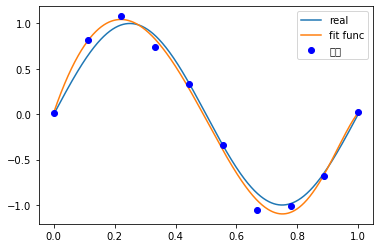

In [29]:
fitting_regularization(9)